In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from numpy.linalg import inv

In [50]:
D = 100
N = 10

In [63]:
observed = np.random.choice(range(D), N, replace = False)
unobserved = np.delete(range(D), observed)
x = np.empty(D)
x[observed] = stats.norm.rvs(0, 5, N)

In [66]:
L = np.zeros((D - 2, D))

for i in range(D - 2):
    j = i
    L[i, j] = -0.5
    L[i, j + 1] = 1
    L[i, j + 2] = -0.5
    
L1 = L[:, unobserved]
L2 = L[:, observed]

lmbda = 2
L = lmbda * np.hstack([L1, L2])

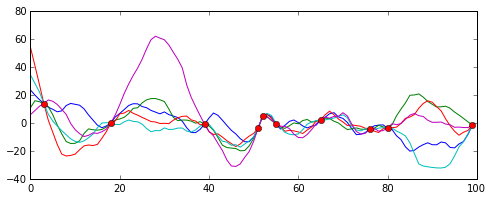

In [67]:
Sigma = inv(L1.T.dot(L1))
mu = -Sigma.dot(L1.T).dot(L2).dot(x[observed])
mvn = stats.multivariate_normal(mu, Sigma)
plt.figure(figsize = (8, 3))
for _ in range(5):
    x[unobserved] = mvn.rvs()
    plt.plot(x)
plt.plot(observed, x[observed], 'ro')
plt.show()

In [80]:
A = np.zeros((N, D))
for i, j in enumerate(observed):
    A[i, j] = 1

y = x[observed]

Sigma_x_inv = L.T.dot(L)
Sigma_x = inv(Sigma_x_inv)
sigma2 = 1
Sigma_y = sigma2 * np.eye(N)
Sigma_y_inv = inv(Sigma_y)
Sigma = inv(Sigma_x_inv + A.T.dot(Sigma_y_inv).dot(A))
mu = Sigma.dot(A.T.dot(Sigma_y_inv).dot(y))
mvn = stats.multivariate_normal(mu, Sigma)

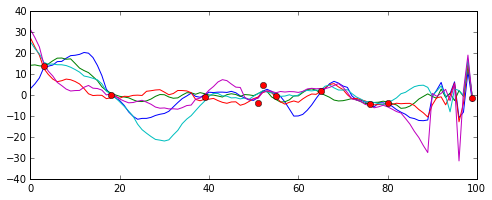

In [81]:
plt.figure(figsize = (8, 3))
for _ in range(5):
    plt.plot(mvn.rvs())
plt.plot(observed, y, 'ro')
plt.show()